In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

In [3]:
print(gameDf.shape)
print(dataDict.shape)

(80000, 49)
(49, 2)


In [4]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [5]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [6]:
gameDf.keys()

Index(['application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6',
       'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13',
       'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20',
       'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27',
       'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34',
       'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41',
       'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46', 'mvar47',
       'default_ind'],
      dtype='object')

In [7]:
gameDf[dic["Credit worthiness score calculated on the basis of borrower's credit history"]]

0        1696.0
1        1846.0
2        1745.0
3        1739.0
4        1787.0
5        1579.0
6        1818.0
7           NaN
8        1836.0
9        1839.0
10       1903.0
11       1681.0
12       1841.0
13       1794.0
14       1669.0
15       1583.0
16       1899.0
17       1690.0
18       1599.0
19       1859.0
20       1880.0
21       1852.0
22       1655.0
23       1863.0
24       1753.0
25       1894.0
26       1803.0
27       1932.0
28       1714.0
29          NaN
          ...  
79970    1834.0
79971    1729.0
79972    1753.0
79973    1748.0
79974    1771.0
79975    1766.0
79976    1822.0
79977    1824.0
79978    1914.0
79979    1600.0
79980    1822.0
79981    1693.0
79982    1735.0
79983    1671.0
79984    1924.0
79985    1670.0
79986    1901.0
79987    1835.0
79988    1927.0
79989       NaN
79990    1941.0
79991    1899.0
79992    1761.0
79993    1700.0
79994    1910.0
79995    1736.0
79996    1724.0
79997    1605.0
79998    1780.0
79999    1727.0
Name: mvar1, Length: 800

In [8]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

In [9]:
#Seperate target variable y (Default or not)
#y= gameDf.pop(dic['Customer spending capacity. 0 = No data available'])

In [10]:
gameDf.keys()

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29',
       'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46', 'mvar47', 'default_ind'],
      dtype='object')

In [11]:
len(gameDf.keys())

48

In [12]:
features = list(dic.keys())

In [13]:
#describe gameDf
gameDf.describe()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,default_ind
count,76361.000000,74447.000000,79499.000000,79499.000000,79499.00000,61036.000000,7.260600e+04,61036.00000,6.859200e+04,7.949800e+04,...,79498.000000,73960.000000,17443.000000,25422.000000,78099.000000,79182.000000,72255.000000,35145.000000,57211.000000,80000.000000
mean,1745.971085,1.105629,5.280955,0.474516,1.12472,1606.702372,1.759581e+04,6773.68666,3.409744e+04,3.049237e+04,...,4.286422,0.090819,98.497452,72.096758,0.335142,6.552777,0.705285,0.070736,0.096135,0.246213
std,94.537617,1.645299,10.815463,1.796261,5.99545,3703.654127,4.708164e+04,10127.74526,5.337692e+04,6.717785e+04,...,3.964464,0.419301,29.762399,24.442156,0.375656,6.311087,0.245879,0.287365,0.346109,0.430806
min,1493.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.014000,0.000000,0.000000,0.000000,0.060660,0.000000,0.000000,0.000000
25%,1679.000000,0.140100,0.000000,0.000000,0.00000,36.000000,1.756000e+03,490.00000,3.498000e+03,1.134000e+03,...,2.000000,0.000000,90.689000,58.153000,0.000000,2.000000,0.515220,0.000000,0.000000,0.000000
50%,1742.000000,0.538900,0.300000,0.000000,0.00000,297.000000,6.967000e+03,2478.00000,1.417100e+04,9.492500e+03,...,3.000000,0.000000,100.000000,78.883500,0.200000,5.000000,0.737030,0.000000,0.000000,0.000000
75%,1810.000000,1.445050,6.447000,0.000000,0.00000,1343.250000,1.805575e+04,9684.25000,4.385375e+04,3.402550e+04,...,6.000000,0.000000,111.698000,91.639750,0.571430,10.000000,0.943475,0.000000,0.000000,0.000000
max,1950.000000,44.630100,286.858000,114.696000,226.52700,136595.000000,5.549600e+06,291810.00000,3.711880e+06,5.633320e+06,...,95.000000,21.000000,430.300000,170.000000,2.000000,91.000000,1.000000,5.000000,19.000000,1.000000


In [14]:
dic[features[0]]

'mvar1'

In [15]:
for i in features:
    print(dic[i], " ", i)
    print(gameDf[dic[i]].describe(), "\n")

mvar1   Credit worthiness score calculated on the basis of borrower's credit history
count    76361.000000
mean      1745.971085
std         94.537617
min       1493.000000
25%       1679.000000
50%       1742.000000
75%       1810.000000
max       1950.000000
Name: mvar1, dtype: float64 

mvar2   A score calculated based on the number and riskiness of credit enquiries made to any lender by a borrower
count    74447.000000
mean         1.105629
std          1.645299
min          0.000000
25%          0.140100
50%          0.538900
75%          1.445050
max         44.630100
Name: mvar2, dtype: float64 

mvar3   Severity of default by the borrower on any loan(s). Severity is a function of amount, time since default and number of defaults
count    79499.000000
mean         5.280955
std         10.815463
min          0.000000
25%          0.000000
50%          0.300000
75%          6.447000
max        286.858000
Name: mvar3, dtype: float64 

mvar4   Severity of default by the borrower on 

mvar47   Type of product that the applicant applied for. (C = Charge; L = Lending)
count     80000
unique        2
top           C
freq      51840
Name: mvar47, dtype: object 

default_ind   Indicator for default
count    80000.000000
mean         0.246213
std          0.430806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_ind, dtype: float64 



In [16]:
i=features[0]
(80000-gameDf[dic[i]].describe()['count'])/gameDf[dic[i]].describe()['count']

0.0476552166681945

In [17]:
#number of misssing values
print("\t\t\t\t\t      Count", "\t#mising values", "\t%missing values")
for i in features:
#     print(i[:25])
    print(dic[i], " ", i[:35], " " ,gameDf[dic[i]].describe()['count'], "\t ", 80000-gameDf[dic[i]].describe()['count'], " \t", 100*(80000-gameDf[dic[i]].describe()['count'])/80000)

					      Count 	#mising values 	%missing values
mvar1   Credit worthiness score calculated    76361.0 	  3639.0  	 4.54875
mvar2   A score calculated based on the num   74447.0 	  5553.0  	 6.94125
mvar3   Severity of default by the borrower   79499.0 	  501.0  	 0.62625
mvar4   Severity of default by the borrower   79499.0 	  501.0  	 0.62625
mvar5   Severity of default by the borrower   79499.0 	  501.0  	 0.62625
mvar6   Minimum of credit available on all    61036.0 	  18964.0  	 23.705
mvar7   Maximum of credit available on all    72606.0 	  7394.0  	 9.2425
mvar8   Maximum of credit available on all    61036.0 	  18964.0  	 23.705
mvar9   Sum of available credit on credit c   68592.0 	  11408.0  	 14.26
mvar10   Total amount of credit available on   79498.0 	  502.0  	 0.6275
mvar11   Amount of dues collected post defau   35181.0 	  44819.0  	 56.02375
mvar12   Sum of amount due on active credit    65922.0 	  14078.0  	 17.5975
mvar13   Annual amount paid towards all cred   7164

In [18]:
gameDf.values[7, :]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       198200, 1263525.0, nan, nan, nan, 0.0, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, 0.0833, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, 'C', 0], dtype=object)

In [19]:
#dist of eval set
eval_csv = pd.read_csv('./data/Evaluation_dataset.csv',na_values=["NA", "na", "missing"])
evalDf = pd.DataFrame(eval_csv)

evalDf.describe()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46
count,25000.000000,23828.000000,23046.000000,24830.000000,24830.000000,24830.000000,18773.000000,2.254700e+04,18760.000000,21391.000000,...,22625.000000,24830.000000,23005.000000,5128.000000,7308.000000,24344.000000,24712.000000,22375.000000,11874.000000,17768.000000
mean,582574.500000,1751.198086,0.943321,5.860158,0.411080,1.029131,1807.602088,1.818150e+04,7238.955704,35732.629050,...,4.678541,4.009907,0.087546,96.396320,72.161646,0.328102,6.431248,0.714432,0.073269,0.081833
std,7217.022701,97.487803,1.447225,12.262912,1.616504,5.502576,3847.006727,4.366567e+04,10398.684072,49353.703919,...,4.746114,3.792525,0.403627,30.599735,24.578127,0.378251,6.124857,0.244369,0.298549,0.304468
min,570075.000000,1508.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.076000,0.000000,0.000000,0.000000,0.075340,0.000000,0.000000
25%,576324.750000,1680.000000,0.110600,0.000000,0.000000,0.000000,47.000000,1.765500e+03,496.000000,3606.000000,...,1.000000,1.000000,0.000000,88.345000,58.333000,0.000000,2.000000,0.523750,0.000000,0.000000
50%,582574.500000,1747.000000,0.445100,0.285000,0.000000,0.000000,340.000000,7.433000e+03,2890.000000,16319.000000,...,4.000000,3.000000,0.000000,100.000000,79.010500,0.181820,5.000000,0.749120,0.000000,0.000000
75%,588824.250000,1822.000000,1.263550,7.049750,0.000000,0.000000,1632.000000,1.906950e+04,10540.000000,49154.000000,...,7.000000,5.000000,0.000000,109.886750,91.895000,0.571430,10.000000,0.951965,0.000000,0.000000
max,595074.000000,1950.000000,25.315300,399.334000,22.963900,134.543000,68899.000000,1.833350e+06,218131.000000,635253.000000,...,50.000000,97.000000,17.000000,646.893000,142.119000,2.000000,52.000000,1.000000,7.000000,3.000000


In [20]:
for i in features:
    print(dic[i], " ", i)
    print(evalDf[dic[i]].describe(), "\n")

mvar1   Credit worthiness score calculated on the basis of borrower's credit history
count    23828.000000
mean      1751.198086
std         97.487803
min       1508.000000
25%       1680.000000
50%       1747.000000
75%       1822.000000
max       1950.000000
Name: mvar1, dtype: float64 

mvar2   A score calculated based on the number and riskiness of credit enquiries made to any lender by a borrower
count    23046.000000
mean         0.943321
std          1.447225
min          0.000000
25%          0.110600
50%          0.445100
75%          1.263550
max         25.315300
Name: mvar2, dtype: float64 

mvar3   Severity of default by the borrower on any loan(s). Severity is a function of amount, time since default and number of defaults
count    24830.000000
mean         5.860158
std         12.262912
min          0.000000
25%          0.000000
50%          0.285000
75%          7.049750
max        399.334000
Name: mvar3, dtype: float64 

mvar4   Severity of default by the borrower on 

KeyError: 'default_ind'

In [24]:
#dist for leaderboard set
leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)

leaderDf.describe()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46
count,25000.000000,23850.000000,23294.000000,24842.000000,24842.000000,24842.000000,19193.000000,2.269400e+04,19193.000000,21523.000000,...,22621.000000,24842.000000,23078.000000,5458.000000,7748.000000,24367.000000,24723.000000,22538.000000,11027.000000,17851.000000
mean,362552.500000,1746.901551,1.118127,5.243267,0.463290,1.080183,1624.069192,1.775037e+04,6753.202313,33825.554662,...,4.237832,4.251349,0.089912,98.491140,71.990942,0.331992,6.546091,0.702558,0.071280,0.092712
std,7217.022701,94.088195,1.658707,10.605688,1.688155,5.813250,3588.247900,5.485979e+04,10133.583639,51781.414456,...,4.678669,3.870975,0.444250,30.488996,24.806054,0.374753,6.260583,0.246612,0.302654,0.321896
min,350053.000000,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.018000,0.000000,0.000000,0.000000,0.072760,0.000000,0.000000
25%,356302.750000,1680.000000,0.142725,0.000000,0.000000,0.000000,36.000000,1.701000e+03,494.000000,3518.000000,...,1.000000,2.000000,0.000000,91.338250,58.179500,0.000000,2.000000,0.509132,0.000000,0.000000
50%,362552.500000,1742.000000,0.542400,0.286000,0.000000,0.000000,297.000000,7.011500e+03,2503.000000,14072.000000,...,3.000000,3.000000,0.000000,100.000000,79.123000,0.200000,5.000000,0.732740,0.000000,0.000000
75%,368802.250000,1811.000000,1.469375,6.480000,0.000000,0.000000,1371.000000,1.803575e+04,9595.000000,43009.500000,...,6.000000,6.000000,0.000000,112.237500,91.666000,0.561950,10.000000,0.942372,0.000000,0.000000
max,375052.000000,1950.000000,31.018100,167.740000,21.245200,156.878000,59192.000000,5.637108e+06,223123.000000,840658.000000,...,77.000000,73.000000,20.000000,631.360000,182.111000,2.000000,63.000000,1.000000,7.000000,3.000000


In [25]:
for i in features:
    print(dic[i], " ", i)
    print(leaderDf[dic[i]].describe(), "\n")

mvar1   Credit worthiness score calculated on the basis of borrower's credit history
count    23850.000000
mean      1746.901551
std         94.088195
min       1477.000000
25%       1680.000000
50%       1742.000000
75%       1811.000000
max       1950.000000
Name: mvar1, dtype: float64 

mvar2   A score calculated based on the number and riskiness of credit enquiries made to any lender by a borrower
count    23294.000000
mean         1.118127
std          1.658707
min          0.000000
25%          0.142725
50%          0.542400
75%          1.469375
max         31.018100
Name: mvar2, dtype: float64 

mvar3   Severity of default by the borrower on any loan(s). Severity is a function of amount, time since default and number of defaults
count    24842.000000
mean         5.243267
std         10.605688
min          0.000000
25%          0.000000
50%          0.286000
75%          6.480000
max        167.740000
Name: mvar3, dtype: float64 

mvar4   Severity of default by the borrower on 

count    7748.000000
mean       71.990942
std        24.806054
min         0.000000
25%        58.179500
50%        79.123000
75%        91.666000
max       182.111000
Name: mvar41, dtype: float64 

mvar42   Financial stress index of the borrower. This index is a function of collection trades, bankruptcies files, tax liens invoked, etc. 
count    24367.000000
mean         0.331992
std          0.374753
min          0.000000
25%          0.000000
50%          0.200000
75%          0.561950
max          2.000000
Name: mvar42, dtype: float64 

mvar43   Number of credit lines on which the borrower has never missed a payment in last 2 yrs, yet considered as high risk loans based on market prediction of economic scenario
count    24723.000000
mean         6.546091
std          6.260583
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         63.000000
Name: mvar43, dtype: float64 

mvar44   Ratio of maximum amount due on all active credit lines and 

KeyError: 'default_ind'

In [26]:
#% of C in C vs L 
print(51840/80000) #train
print(14513/25000) #eval
print(16182/25000) #leader

0.648
0.58052
0.64728


In [27]:
#number of misssing values for all 3 sets
print("\t\t\t\t\t      %Train", "\t%eval", "\t%leader")
for i in features:
#     print(i[:25])
    print(dic[i], " ", i[:35], " " ,100*(80000-gameDf[dic[i]].describe()['count'])/80000, "\t", 100*(25000-evalDf[dic[i]].describe()['count'])/25000, "\t", 100*(25000-leaderDf[dic[i]].describe()['count'])/25000)

					      %Train 	%eval 	%leader
mvar1   Credit worthiness score calculated    4.54875 	 4.688 	 4.6
mvar2   A score calculated based on the num   6.94125 	 7.816 	 6.824
mvar3   Severity of default by the borrower   0.62625 	 0.68 	 0.632
mvar4   Severity of default by the borrower   0.62625 	 0.68 	 0.632
mvar5   Severity of default by the borrower   0.62625 	 0.68 	 0.632
mvar6   Minimum of credit available on all    23.705 	 24.908 	 23.228
mvar7   Maximum of credit available on all    9.2425 	 9.812 	 9.224
mvar8   Maximum of credit available on all    23.705 	 24.96 	 23.228
mvar9   Sum of available credit on credit c   14.26 	 14.436 	 13.908
mvar10   Total amount of credit available on   0.6275 	 0.68 	 0.632
mvar11   Amount of dues collected post defau   56.02375 	 57.56 	 56.104
mvar12   Sum of amount due on active credit    17.5975 	 18.348 	 17.24
mvar13   Annual amount paid towards all cred   10.44 	 18.316 	 10.26
mvar14   Annual income (in $)   0.0 	 0.0 	 0.0
mvar15   

KeyError: 'default_ind'

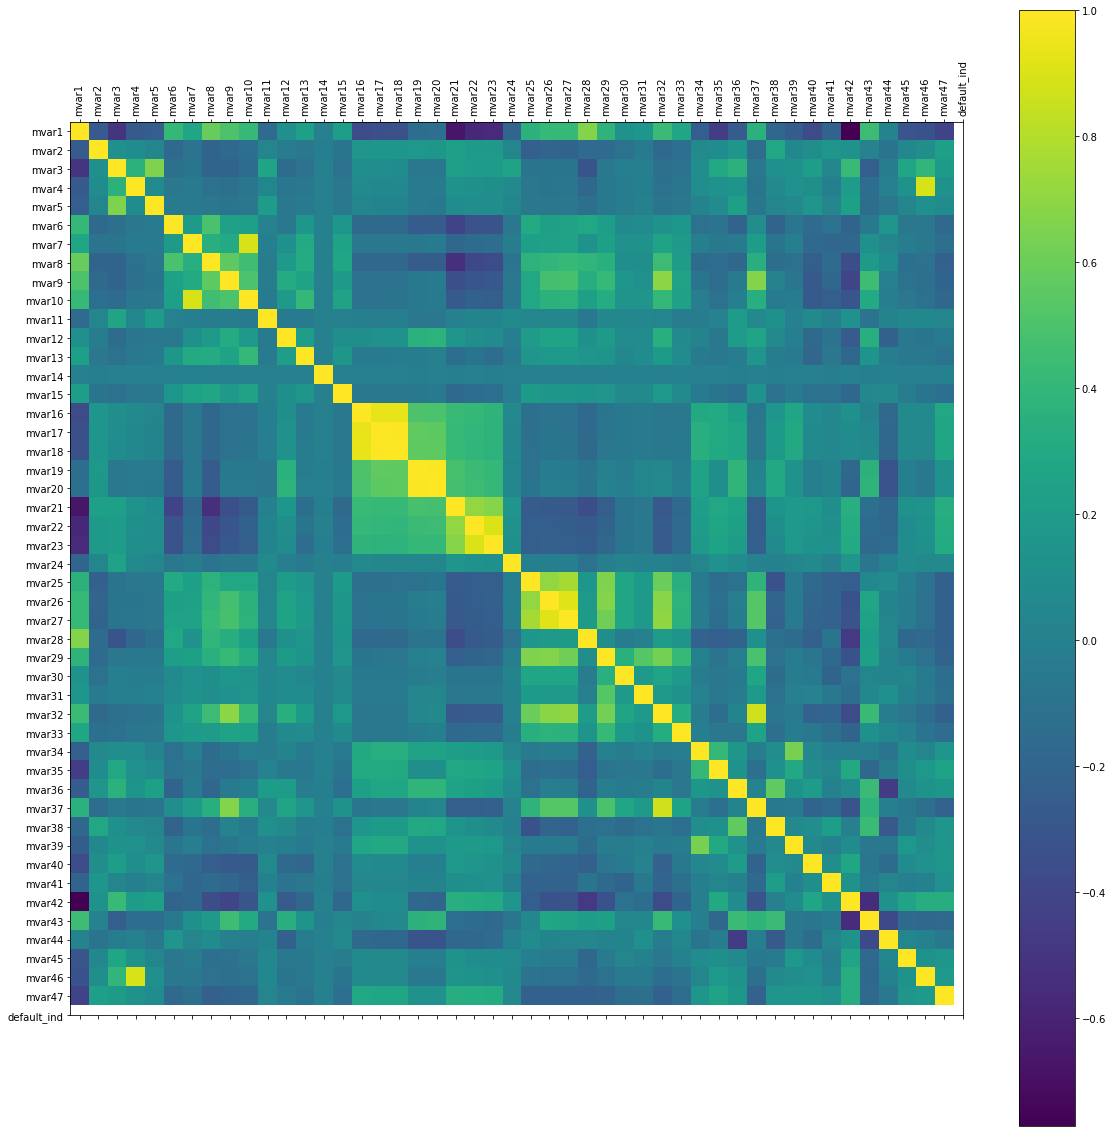

In [157]:
#Correlation plots
#gameDf.corr()
plt.figure(figsize=(20,20))
plt.matshow(gameDf.corr(), fignum=1)
plt.xticks(range(len(gameDf.columns)), gameDf.columns, rotation="vertical")
plt.yticks(range(len(gameDf.columns)), gameDf.columns)
plt.colorbar()
plt.show()

In [30]:
gameDf.corr().

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,default_ind
mvar1,1.000000,-0.265793,-0.502089,-0.268229,-0.240259,0.405196,0.267627,0.588904,0.506039,0.415873,...,-0.174035,-0.250907,-0.363777,-0.208557,-0.771688,0.440592,0.021616,-0.307051,-0.321960,-0.417302
mvar2,-0.265793,1.000000,0.119156,0.086873,0.039322,-0.168128,-0.096857,-0.203014,-0.158317,-0.122271,...,0.285102,0.053952,0.100970,0.159704,0.137295,0.014375,-0.089405,0.056462,0.100936,0.227953
mvar3,-0.502089,0.119156,1.000000,0.368939,0.658109,-0.117079,-0.084982,-0.202675,-0.200606,-0.146626,...,0.114511,0.128314,0.213647,0.033008,0.432163,-0.245018,-0.018925,0.267140,0.392322,0.194814
mvar4,-0.268229,0.086873,0.368939,1.000000,0.091933,-0.067449,-0.045899,-0.111535,-0.118342,-0.074592,...,0.064709,0.123631,0.107712,-0.003572,0.209824,-0.130205,0.001213,0.135537,0.892075,0.141313
mvar5,-0.240259,0.039322,0.658109,0.091933,1.000000,-0.040019,-0.048359,-0.072506,-0.086020,-0.072473,...,0.034388,0.058855,0.155475,0.036596,0.235934,-0.132246,-0.067406,0.041785,0.117824,0.088442
mvar6,0.405196,-0.168128,-0.117079,-0.067449,-0.040019,1.000000,0.192671,0.490946,0.243674,0.230486,...,-0.205386,-0.076016,-0.154404,-0.102246,-0.201271,-0.054085,0.152521,-0.072196,-0.062485,-0.163856
mvar7,0.267627,-0.096857,-0.084982,-0.045899,-0.048359,0.192671,1.000000,0.345828,0.308526,0.891959,...,-0.080942,-0.014592,-0.165445,-0.187826,-0.181921,0.115480,0.036661,-0.027935,-0.062547,-0.114585
mvar8,0.588904,-0.203014,-0.202675,-0.111535,-0.072506,0.490946,0.345828,1.000000,0.560884,0.455136,...,-0.129942,-0.103041,-0.235222,-0.154867,-0.356205,0.186343,0.089321,-0.121916,-0.109787,-0.228546
mvar9,0.506039,-0.158317,-0.200606,-0.118342,-0.086020,0.243674,0.308526,0.560884,1.000000,0.498627,...,0.022249,-0.074108,-0.278261,-0.179703,-0.400814,0.451355,0.001032,-0.112344,-0.127856,-0.198013
mvar10,0.415873,-0.122271,-0.146626,-0.074592,-0.072473,0.230486,0.891959,0.455136,0.498627,1.000000,...,-0.035861,-0.029197,-0.268487,-0.232596,-0.300776,0.312105,-0.011159,-0.069100,-0.102893,-0.172239


In [74]:
v1 = 17
v2 = 19
gameDf.corr().iloc[v1-1,v2-1]

0.56590499267508465

In [83]:
gameDf.dtypes

mvar1          float64
mvar2          float64
mvar3          float64
mvar4          float64
mvar5          float64
mvar6          float64
mvar7          float64
mvar8          float64
mvar9          float64
mvar10         float64
mvar11         float64
mvar12         float64
mvar13         float64
mvar14           int64
mvar15         float64
mvar16         float64
mvar17         float64
mvar18         float64
mvar19         float64
mvar20         float64
mvar21         float64
mvar22         float64
mvar23         float64
mvar24         float64
mvar25         float64
mvar26         float64
mvar27         float64
mvar28         float64
mvar29         float64
mvar30         float64
mvar31         float64
mvar32         float64
mvar33         float64
mvar34         float64
mvar35         float64
mvar36         float64
mvar37         float64
mvar38         float64
mvar39         float64
mvar40         float64
mvar41         float64
mvar42         float64
mvar43         float64
mvar44     

In [100]:
gameDf[dic[features[0]]].corr(gameDf[dic[features[1]]])

-0.26579277101410331

In [106]:
v1 = 17
print("mvar", v1)
for i in range(0, 46):
    print("mvar", i+1, " ", gameDf.iloc[:, v1-1].corr(gameDf.iloc[:,i]))

mvar 17
mvar 1   -0.341212182504
mvar 2   0.156583130951
mvar 3   0.0970161291969
mvar 4   0.0558871993865
mvar 5   0.0300544467312
mvar 6   -0.161176759935
mvar 7   -0.0634266241671
mvar 8   -0.182309675805
mvar 9   -0.106395930995
mvar 10   -0.0944689880399
mvar 11   -0.0140860906317
mvar 12   0.124437289436
mvar 13   -0.0363065913385
mvar 14   -0.000815168591843
mvar 15   -0.063306595563
mvar 16   0.938673320267
mvar 17   1.0
mvar 18   0.990621368887
mvar 19   0.565904992676
mvar 20   0.556615139286
mvar 21   0.413508167447
mvar 22   0.398416599497
mvar 23   0.372883097247
mvar 24   0.0502349426206
mvar 25   -0.116993422186
mvar 26   -0.085647729406
mvar 27   -0.0949733815718
mvar 28   -0.161869979541
mvar 29   -0.076108077298
mvar 30   -0.0554043758055
mvar 31   -0.0352534208436
mvar 32   -0.0654522263447
mvar 33   -0.0575577305641
mvar 34   0.344029913148
mvar 35   0.308606980702
mvar 36   0.267143251641
mvar 37   -0.0711228182491
mvar 38   0.193091145208
mvar 39   0.303510319532


/home/ekka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


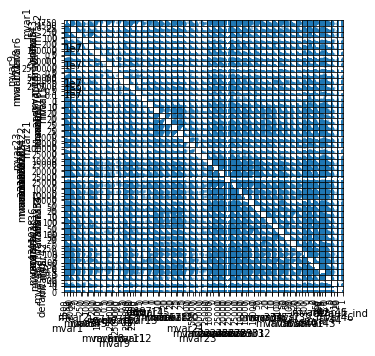

In [21]:
# pd.scatter_matrix(gameDf, figsize=(5,5))
# plt.show()